(b) Use Matlab or Python to generate a sequence of length 4 seconds of x[n].
(c) Use the Matlab command soundsc or the Python command sounddevice.play to listen to
the harmonic when the normalized frequency f1 = 0.3 and the sampling rate Fs is given by
respectively 1000Hz, 3000Hz and 12000Hz.
Comment on what you hear.
(d) Now assume a fixed sampling rate Fs = 8000Hz while the physical frequency F1 is
respectively 1000Hz, 3000Hz and 6000Hz.
Comment on what you hear.
Relate it to the corresponding normalized frequency f1.

In [2]:
import sounddevice as sd
import numpy as np

In [8]:
# Parameters
A = 1.0       # amplitude
f1 = 0.3      # normalized frequency
duration = 4  # seconds

# Different sampling rates to test
Fs_list = [1000, 3000, 12000]

for Fs in Fs_list:
    N = int(duration * Fs)                  # number of samples
    n = np.arange(N)                        # discrete time indices
    x = A * np.cos(2 * np.pi * f1 * n)      # harmonic sequence
    
    print(f"Playing with Fs = {Fs} Hz")
    sd.play(x, Fs)
    sd.wait()   # wait until playback is finished



Playing with Fs = 1000 Hz
Playing with Fs = 3000 Hz
Playing with Fs = 12000 Hz


Playing tone: F1 = 1000 Hz, normalized f1 = 0.125
Playing tone: F1 = 3000 Hz, normalized f1 = 0.375
Playing tone: F1 = 6000 Hz, normalized f1 = 0.750


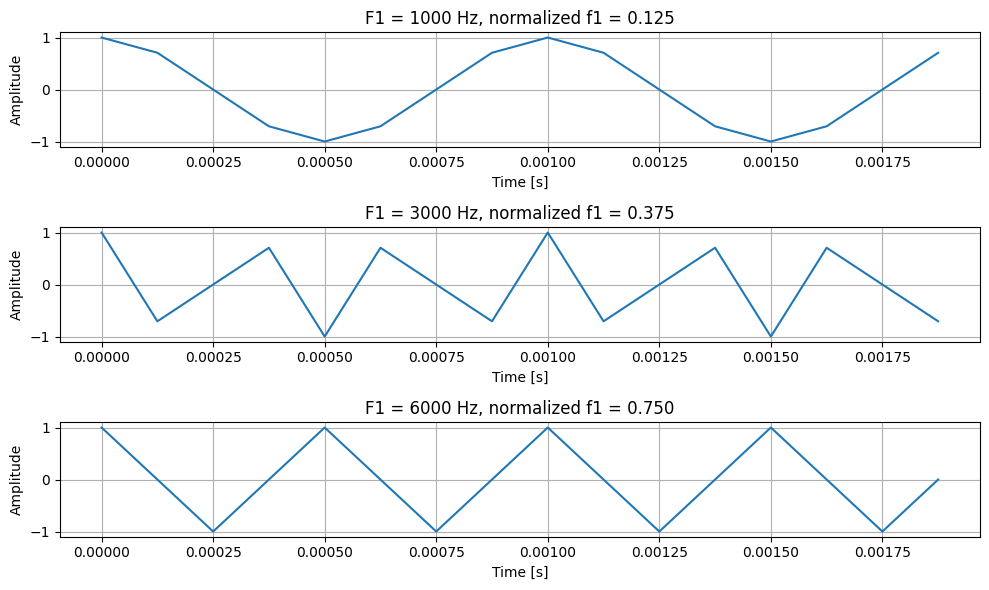

In [11]:
import matplotlib.pyplot as plt

# Parameters
A = 1.0       # amplitude
duration = 4  # seconds
Fs = 8000     # fixed sampling rate
F1_list = [1000, 3000, 6000]  # physical frequencies

plt.figure(figsize=(10, 6))

for i, F1 in enumerate(F1_list, 1):
    f1 = F1 / Fs                          # normalized frequency
    N = int(duration * Fs)                # number of samples
    n = np.arange(N)                      # discrete time indices
    x = A * np.cos(2 * np.pi * f1 * n)    # harmonic sequence

    # Play the sound
    print(f"Playing tone: F1 = {F1} Hz, normalized f1 = {f1:.3f}")
    sd.play(x, Fs)
    sd.wait()

    # Plot only the first 2 ms to visualize waveform
    t = n / Fs
    samples_to_plot = int(0.002 * Fs)  # first 2 ms
    plt.subplot(3, 1, i)
    plt.plot(t[:samples_to_plot], x[:samples_to_plot])
    plt.title(f"F1 = {F1} Hz, normalized f1 = {f1:.3f}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()
